In [ ]:
%pip install requests pandas matplotlib tqdm

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
url = "https://gamma-api.polymarket.com/events"
params = {
    "closed": True,
    "start_date_min": "2024-01-01T00:00:00Z",
    "end_date_max": "2025-12-31T23:59:59Z",
    "volume_min": 100_000,
    "limit": 100,
    "order": "volume",
    "ascending": False,
    "exclude_tag_id": [1],  # excluding sports
}

response = requests.get(url, params=params)
events = response.json()

print(f"Fetched {len(events)} events")

Fetched 100 events


In [42]:
df = pd.DataFrame(events)

df.head(3)

,id,ticker,slug,title,description,resolutionSource,startDate,creationDate,endDate,image,...,deployingTimestamp,live,ended,eventCreators,estimatedValue,liquidity,volume24hr,liquidityClob,competitive,liquidityAmm
0,903193,presidential-election-winner-2024,presidential-election-winner-2024,Presidential Election Winner 2024,This is a market on predicting the winner of t...,,2024-01-04T22:58:00Z,2024-01-04T23:04:57.844Z,2024-11-05T12:00:00Z,https://polymarket-upload.s3.us-east-2.amazona...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,903216,presidential-election-popular-vote-winner-2024,presidential-election-popular-vote-winner-2024,Popular Vote Winner 2024,This is a market on predicting the winner of t...,,2024-01-09T23:37:00Z,2024-01-09T23:53:13.408Z,2024-11-04T12:00:00Z,https://polymarket-upload.s3.us-east-2.amazona...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14023,who-will-be-inaugurated-as-president,who-will-be-inaugurated-as-president,Who will be inaugurated as President?,This is a market on predicting which individua...,,2024-11-01T22:47:12.269661Z,2024-11-01T22:47:12.269657Z,2025-01-20T12:00:00Z,https://polymarket-upload.s3.us-east-2.amazona...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df['volume'] = pd.to_numeric(df.get('volume', 0))
df['start_date'] = pd.to_datetime(df['startDate'], utc=True, format='mixed')
df['end_date'] = pd.to_datetime(df['endDate'], utc=True, format='mixed')
df['duration_days'] = (df['end_date'] - df['start_date']).dt.days

print(f"Parsing results:")
print(f"Total events: {len(df)}")

Parsing results:
Total events: 100


In [44]:
filtered_df = df[df["duration_days"] >= 100][['id', 'title', 'volume', 'start_date', 'end_date', 'description', 'duration_days']].copy()

print(f"Top 30 events by volume in 2024\n")
print(f"Total volume: ${filtered_df['volume'].sum():,.0f}")

Top 30 events by volume in 2024

Total volume: $8,889,469,062


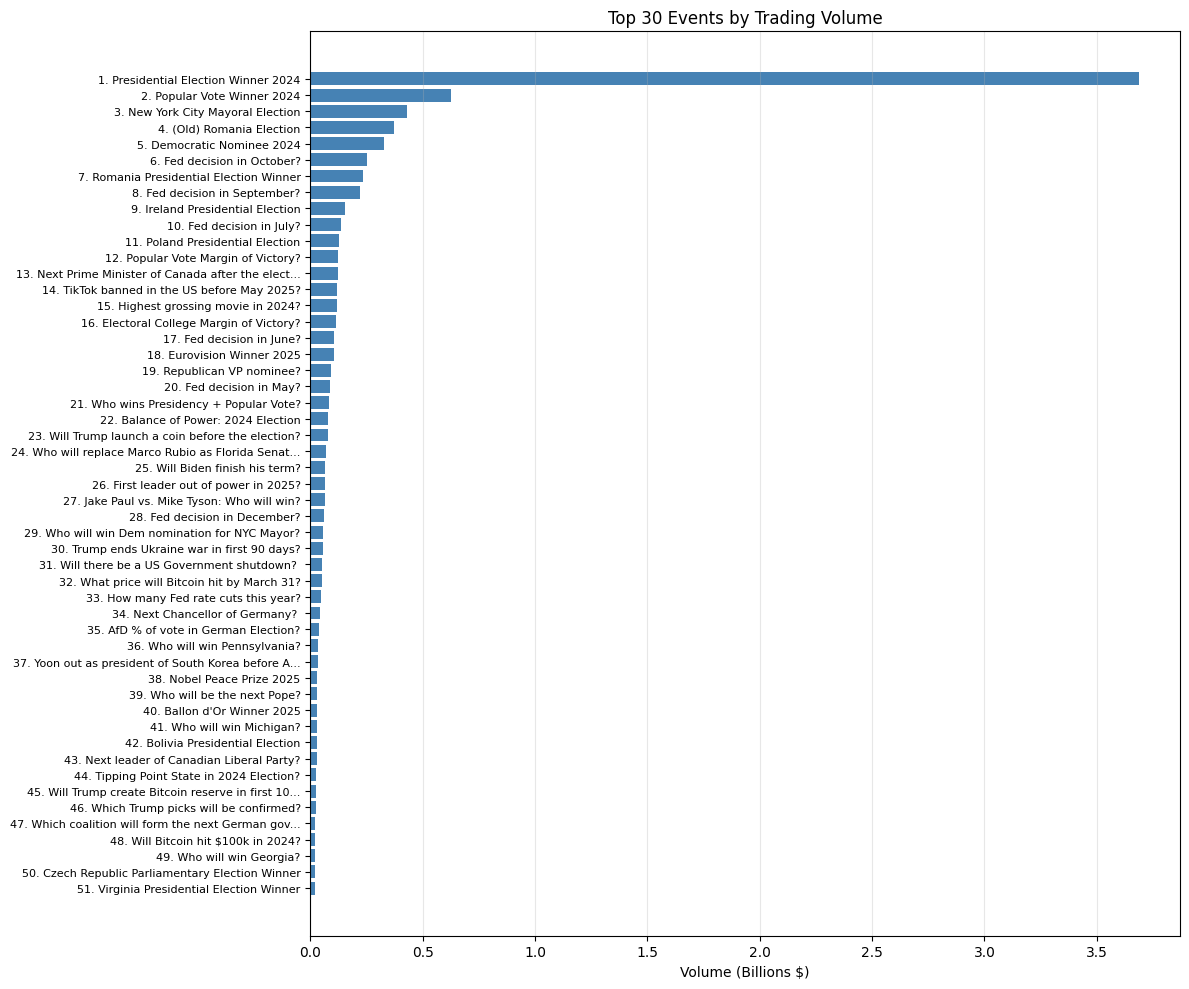

In [45]:
plt.figure(figsize=(12, 10))
plt.barh(range(len(filtered_df)), filtered_df['volume'] / 1e9, color='steelblue')
plt.yticks(range(len(filtered_df)), [f"{i+1}. {t[:45]}..." if len(t) > 45 else f"{i+1}. {t}" for i, t in enumerate(filtered_df['title'])], fontsize=8)
plt.xlabel('Volume (Billions $)')
plt.title('Top 30 Events by Trading Volume')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

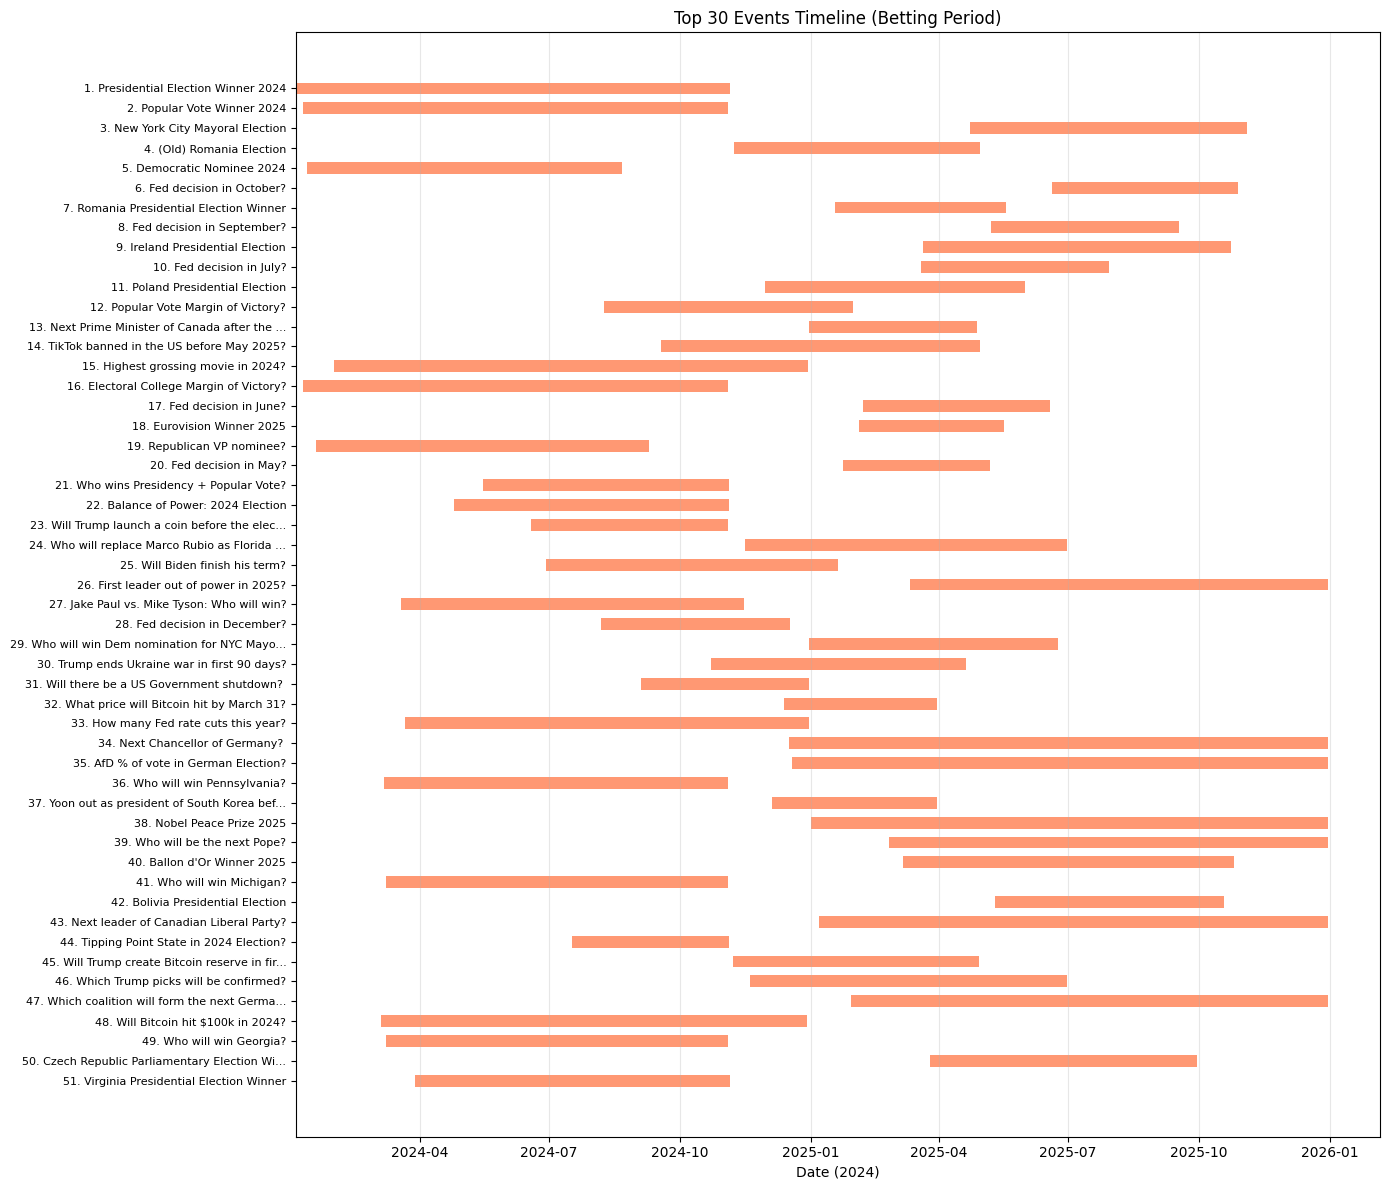

In [46]:
plt.figure(figsize=(14, 12))

for i, (start, end, title) in enumerate(zip(filtered_df['start_date'], filtered_df['end_date'], filtered_df['title'])):
    duration = (end - start).days
    plt.barh(i, duration, left=start, height=0.6, color='coral', alpha=0.8)

plt.yticks(range(len(filtered_df)), [f"{i+1}. {t[:40]}..." if len(t) > 40 else f"{i+1}. {t}" for i, t in enumerate(filtered_df['title'])], fontsize=8)
plt.xlabel('Date (2024)')
plt.title('Top 30 Events Timeline (Betting Period)')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [ ]:
print("Events with 100 days duration:\n")
for idx, row in filtered_df.iterrows():
    print(f"{row['title'][:60]} | '{row['id']}'")
    print(f"  Volume: ${row['volume']:,.0f}")
    print(f"  Duration: {row['duration_days']} days ({row['duration_days']/30:.1f} months)")
    print(f"  Period: {row['start_date'].date()} → {row['end_date'].date()}\n")

**We are going to investigate these 5 events:**
1. Presidential Election Winner 2024 (903193);
2. Trump ends Ukraine war in first 90 days? (13551);
3. Israel x Hamas ceasefire before July 2025 (21257);
4. TikTok banned in the US before May 2025? (12641);
5. Will Biden finish his term? (11322);